In [1]:
import os
from pathlib import Path
path = Path(os.getcwd()).parent
src_path = str(path/"src")
params_path = str(path/"params.yaml")

In [2]:
import sys  
sys.path.append(src_path)

In [3]:
from tensorflow.keras.callbacks import LearningRateScheduler
from pipeline.train_utils import lrfn, MapDict
from matplotlib import pyplot as plt
import yaml

In [4]:
lr_callback = LearningRateScheduler(lambda epoch: lrfn("abc", epoch), verbose=True)

In [5]:
with open(params_path, "r") as params_file:
    params = yaml.load(params_file)
params = MapDict(params)
print(params)

{'dataset': {'image_size': 331, 'gcs_path': 'gs://kaggle-data-tpu/images', 'gcs_path_remote_alias': 'gcs_images', 'classes': ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']}, 'split': {'train_split_path': 'data/interim/train_split.json', 'val_split_path': 'data/interim/val_split.json', 'images_count_path': 'data/interim/images_count.json', 'validation_split': 0.19}, 'train': {'nb_validation_samples': 800, 'epochs': 10, 'batch_size': 16, 'lr': {'start': 1e-05, 'max': 5e-05, 'min': 1e-05, 'rampup_epochs': 5, 'sustain_epochs': 0, 'exp_decay': 0.8}}}


In [10]:
lr = MapDict(params["train"]["lr"])
classes = params["dataset"]["classes"]
classes

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

{'start': 1e-05, 'max': 5e-05, 'min': 1e-05, 'rampup_epochs': 5, 'sustain_epochs': 0, 'exp_decay': 0.8}
{'start': 1e-05, 'max': 5e-05, 'min': 1e-05, 'rampup_epochs': 5, 'sustain_epochs': 0, 'exp_decay': 0.8}
{'start': 1e-05, 'max': 5e-05, 'min': 1e-05, 'rampup_epochs': 5, 'sustain_epochs': 0, 'exp_decay': 0.8}
{'start': 1e-05, 'max': 5e-05, 'min': 1e-05, 'rampup_epochs': 5, 'sustain_epochs': 0, 'exp_decay': 0.8}
{'start': 1e-05, 'max': 5e-05, 'min': 1e-05, 'rampup_epochs': 5, 'sustain_epochs': 0, 'exp_decay': 0.8}
{'start': 1e-05, 'max': 5e-05, 'min': 1e-05, 'rampup_epochs': 5, 'sustain_epochs': 0, 'exp_decay': 0.8}
{'start': 1e-05, 'max': 5e-05, 'min': 1e-05, 'rampup_epochs': 5, 'sustain_epochs': 0, 'exp_decay': 0.8}
{'start': 1e-05, 'max': 5e-05, 'min': 1e-05, 'rampup_epochs': 5, 'sustain_epochs': 0, 'exp_decay': 0.8}
{'start': 1e-05, 'max': 5e-05, 'min': 1e-05, 'rampup_epochs': 5, 'sustain_epochs': 0, 'exp_decay': 0.8}
{'start': 1e-05, 'max': 5e-05, 'min': 1e-05, 'rampup_epochs': 5,

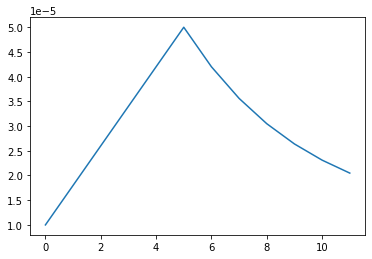

In [11]:
rng = [i for i in range(12)]
y = [lrfn(lr, x) for x in rng]
plt.plot(rng, y)